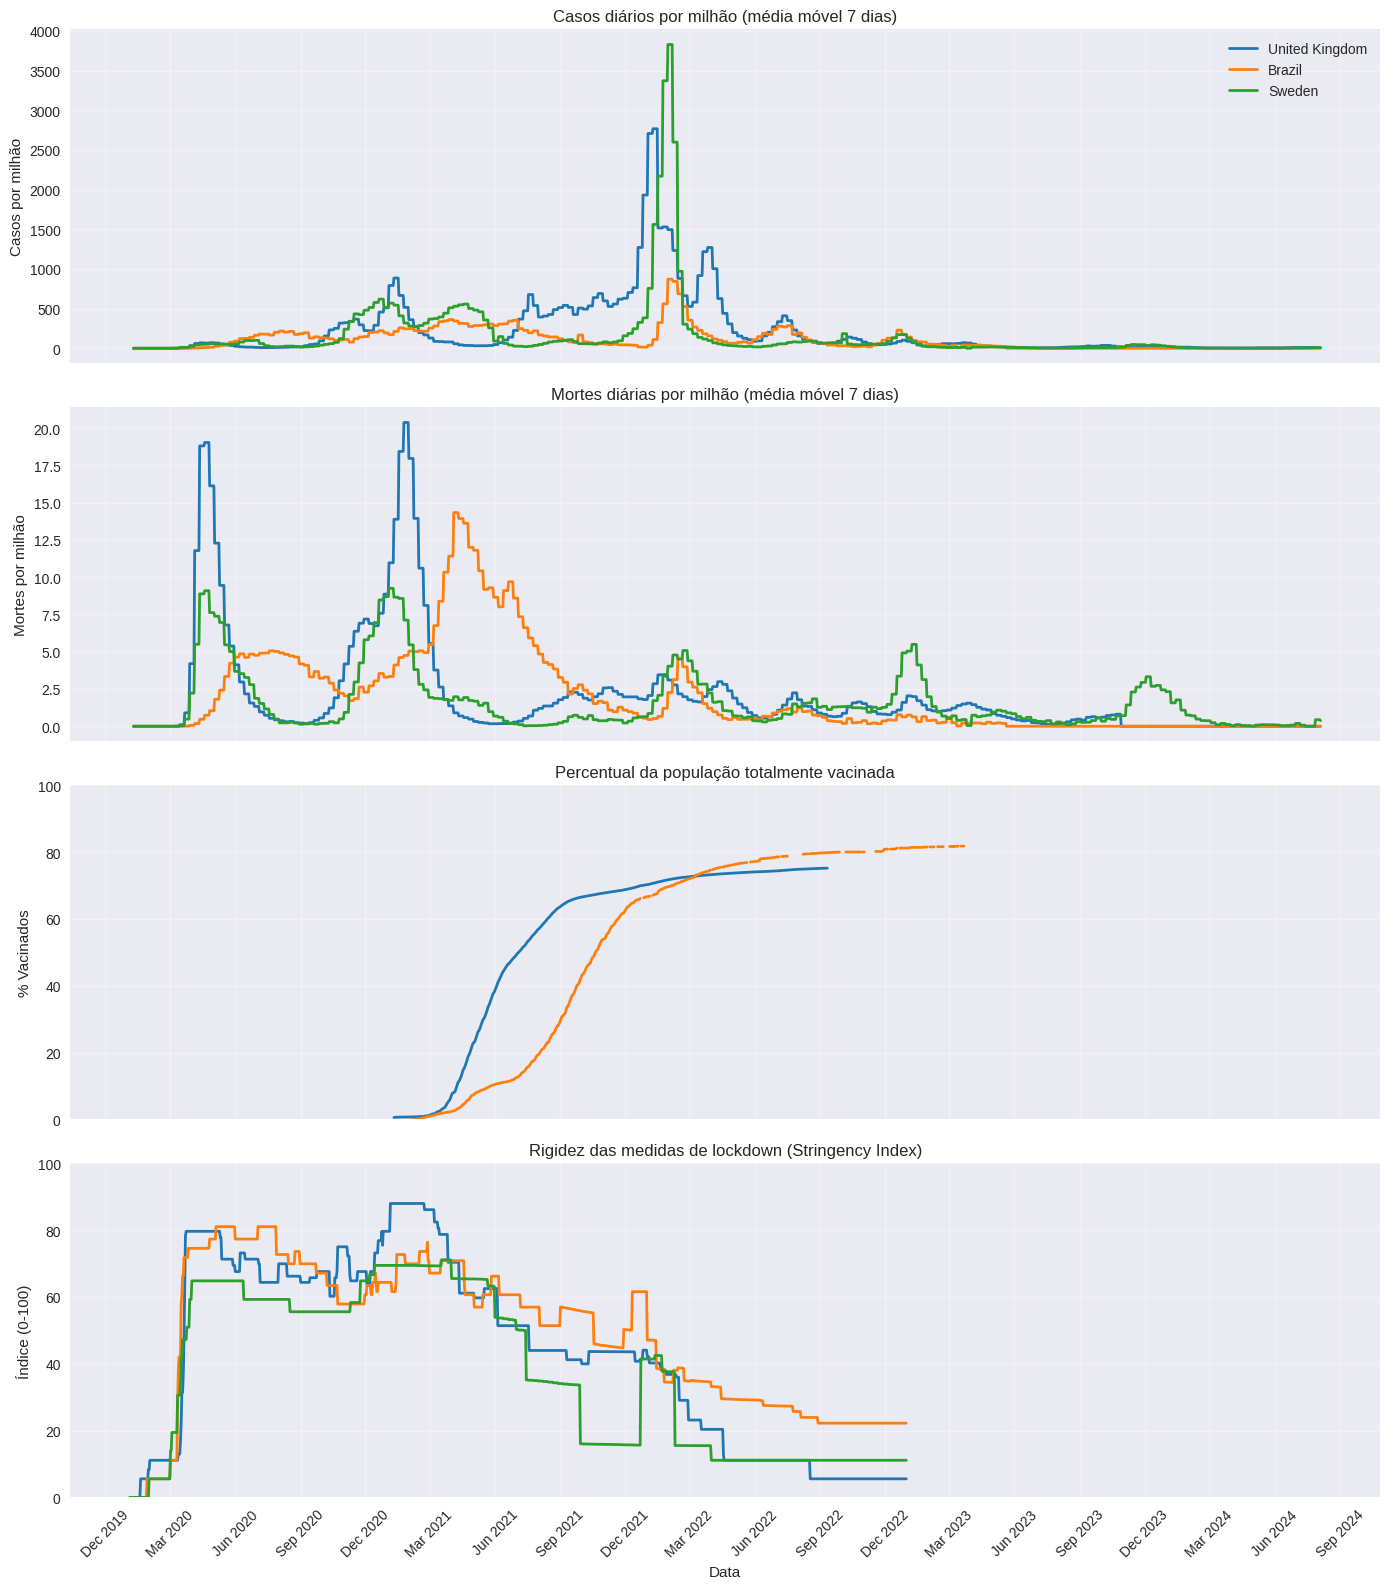


DADOS RESUMIDOS (até maio 2023):

United Kingdom:
- Máximo de casos/milhão em um dia: 2766.5
- Máximo de mortes/milhão em um dia: 20.4
- Percentual máximo vacinados: 75.2%
- Pico de rigidez do lockdown: 88.0/100

Brazil:
- Máximo de casos/milhão em um dia: 871.5
- Máximo de mortes/milhão em um dia: 14.3
- Percentual máximo vacinados: 81.8%
- Pico de rigidez do lockdown: 81.0/100

Sweden:
- Máximo de casos/milhão em um dia: 3828.3
- Máximo de mortes/milhão em um dia: 9.2
- Percentual máximo vacinados: 72.0%
- Pico de rigidez do lockdown: 71.1/100


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Configuração inicial
plt.style.use('seaborn-v0_8')
paises = ['United Kingdom', 'Brazil', 'Sweden']
cores = {'United Kingdom': '#1f77b4', 'Brazil': '#ff7f0e', 'Sweden': '#2ca02c'}

# Carregar e filtrar dados
df = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")
df['date'] = pd.to_datetime(df['date'])
df = df[df['location'].isin(paises)]

# Salvar o DataFrame filtrado em CSV local
df.to_csv("ProcessamentoDeDados.csv", index=False)

# Criar figura com 4 gráficos
fig, axs = plt.subplots(4, 1, figsize=(14, 16), sharex=True)

# Gráfico 1: Casos por milhão (média móvel)
for pais in paises:
    dados = df[df['location'] == pais]
    axs[0].plot(dados['date'], dados['new_cases_smoothed_per_million'],
               label=pais, color=cores[pais], linewidth=2)
axs[0].set_title('Casos diários por milhão (média móvel 7 dias)')
axs[0].set_ylabel('Casos por milhão')
axs[0].legend()
axs[0].grid(alpha=0.3)

# Gráfico 2: Mortes por milhão (média móvel)
for pais in paises:
    dados = df[df['location'] == pais]
    axs[1].plot(dados['date'], dados['new_deaths_smoothed_per_million'],
               label=pais, color=cores[pais], linewidth=2)
axs[1].set_title('Mortes diárias por milhão (média móvel 7 dias)')
axs[1].set_ylabel('Mortes por milhão')
axs[1].grid(alpha=0.3)

# Gráfico 3: Vacinação (% população totalmente vacinada)
for pais in paises:
    dados = df[df['location'] == pais]
    axs[2].plot(dados['date'], dados['people_fully_vaccinated_per_hundred'],
               label=pais, color=cores[pais], linewidth=2)
axs[2].set_title('Percentual da população totalmente vacinada')
axs[2].set_ylabel('% Vacinados')
axs[2].set_ylim(0, 100)
axs[2].grid(alpha=0.3)

# Gráfico 4: Rigidez do lockdown (Stringency Index)
for pais in paises:
    dados = df[df['location'] == pais]
    axs[3].plot(dados['date'], dados['stringency_index'],
               label=pais, color=cores[pais], linewidth=2)
axs[3].set_title('Rigidez das medidas de lockdown (Stringency Index)')
axs[3].set_ylabel('Índice (0-100)')
axs[3].set_xlabel('Data')
axs[3].set_ylim(0, 100)
axs[3].grid(alpha=0.3)

# Formatar eixos de data
for ax in axs:
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()
plt.show()

# Dados resumidos (máximos)
print("\nDADOS RESUMIDOS (até maio 2023):")
for pais in paises:
    dados = df[df['location'] == pais].dropna(subset=['total_cases', 'total_deaths'])
    if not dados.empty:
        print(f"\n{pais}:")
        print(f"- Máximo de casos/milhão em um dia: {dados['new_cases_smoothed_per_million'].max():.1f}")
        print(f"- Máximo de mortes/milhão em um dia: {dados['new_deaths_smoothed_per_million'].max():.1f}")
        print(f"- Percentual máximo vacinados: {dados['people_fully_vaccinated_per_hundred'].max():.1f}%")
        print(f"- Pico de rigidez do lockdown: {dados['stringency_index'].max():.1f}/100")


In [10]:
from google.colab import files
files.download('ProcessamentoDeDados.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>